In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|██████████| 2000/2000 [00:00<00:00, 2222.51it/s]


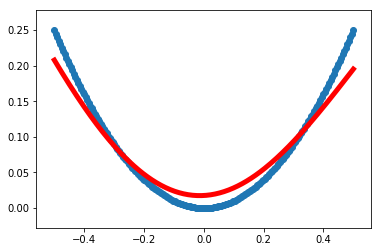

In [27]:
x_data = np.linspace(-0.5, 0.5, 200).reshape([200,1])
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# input 1x1 output 1x1
# L1: 1x10
# middle
Weight_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1)+ biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# output layer
# L2: fully connect 10x1
Weight_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2)+ biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in tqdm(range(2000)):
        sess.run(train_step, feed_dict = {x:x_data, y:y_data})
    
    prediction_value = sess.run(prediction, feed_dict = {x:x_data})
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()
    